In [1]:
%config IPCompleter.greedy=True
import os
from tqdm import tqdm
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from pyproj import CRS,transform
import pygc
from tqdm import tqdm
import os
import rasterio as rio
from osgeo import gdal
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx 
from shapely.wkt import loads
import openeo
import matplotlib.pyplot as plt
from openeo.processes import ProcessBuilder
import pandas as pd
import pygc
import numpy as np
from tqdm import tqdm
import geopandas as gpd
import numpy as np
import pandas as pd
from tqdm import tqdm
import pygc
import geopandas as gpd

In [2]:
main_datafile_path = "biolib_sitelist.csv"

In [3]:
treecoords = pd.read_csv(main_datafile_path)
treecoords

project       site  \
0                                   NATT      S_k_1   
1                                   NATT      S_k_2   
2                                   NATT      S_k_3   
3                                   NATT      S_k_4   
4                                   NATT      S_k_5   
...                                  ...        ...   
12457  NSW Cobar Peneplain biomass study  S_k_12458   
12458  NSW Cobar Peneplain biomass study  S_k_12459   
12459  NSW Cobar Peneplain biomass study  S_k_12460   
12460  NSW Cobar Peneplain biomass study  S_k_12461   
12461  NSW Cobar Peneplain biomass study  S_k_12462   

                                                 geom  longitude  latitude  
0       POINT (131.11779999914515 -13.07689999946378)   131.1178  -13.0769  
1       POINT (131.3827999990662 -14.130599999443225)   131.3828  -14.1306  
2      POINT (131.38809999906394 -14.159199999440183)   131.3881  -14.1592  
3      POINT (132.37056699906708 -15.258782999753187)   132.3706  -15.2588  
4       POINT (131.1524999991847 -12.494199999482408)   131.1525  -12.4942  
...                                               ...        ...       ...  
12457   POINT (145.90896512912667 -31.09955869921299)   145.9090  -31.0996  
12458  POINT (145.92864662308884 -30.730837517872434)   145.9286  -30.7308  
12459   POINT (145.9359036850207 -30.681572049490295)   145.9359  -30.6816  
12460   POINT (145.90099366214787 -30.67584808012455)   145.9010  -30.6758  
12461  POINT (146.01438972671482 -32.069042742408826)   146.0144  -32.0690  

[12462 rows x 5 columns]

In [5]:
# convert csv geom to shapely geom
treecoords['geom'] = treecoords['geom'].apply(loads)

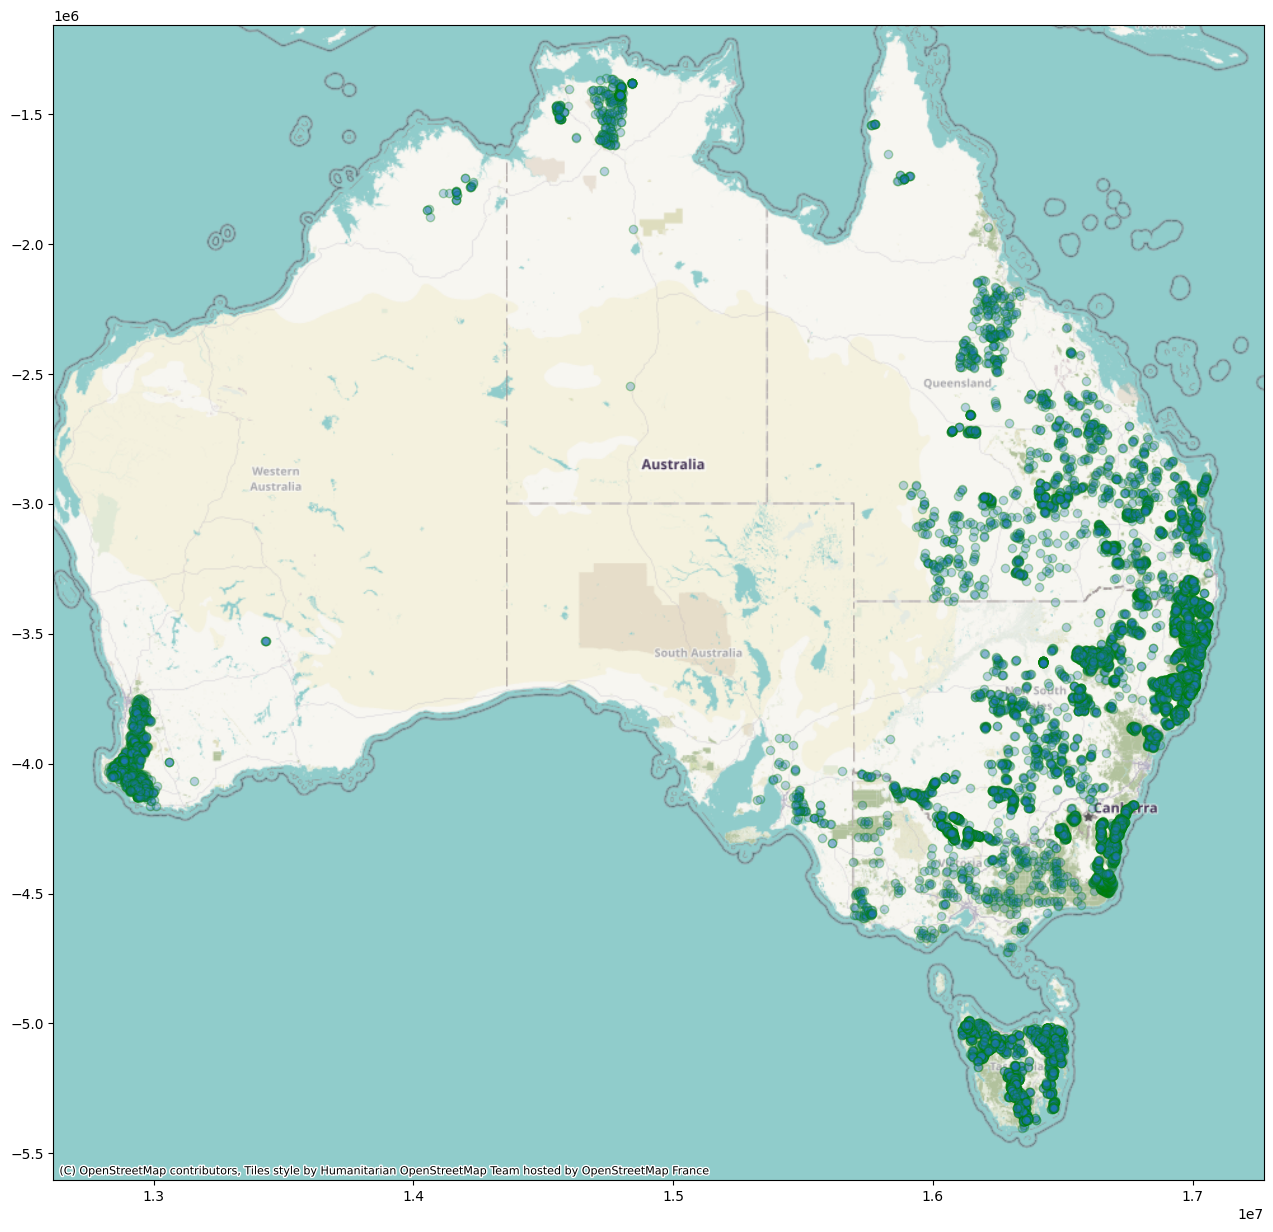

In [6]:
# creating a geopandas dataframe for visualisation of points
gdf = gpd.GeoDataFrame(treecoords, geometry=treecoords.geom)
# assiging CRS as WGS84
gdf.crs = "EPSG:4326"
# converting CRS to Web Mercator, the reference system of the contextily basemap
gdf_epsg3857 = gdf.to_crs(epsg=3857)
# plotting GEDI suborbits
ax=gdf_epsg3857[:-1].plot(figsize=(30, 15), alpha=0.3, edgecolor='green')
# adding to contextily basemap
ctx.add_basemap(ax)

In [7]:
batch1 = treecoords.loc[(treecoords["latitude"] <= -10) &(treecoords["latitude"] > -20)] #400
batch2 = treecoords.loc[(treecoords["latitude"] <= -20) &(treecoords["latitude"] > -30)] #2700
batch3 = treecoords.loc[(treecoords["latitude"] <= -30) &(treecoords["latitude"] > -40)] #7246
batch4 = treecoords.loc[(treecoords["latitude"] <= -40) &(treecoords["latitude"] > -50)] #2116

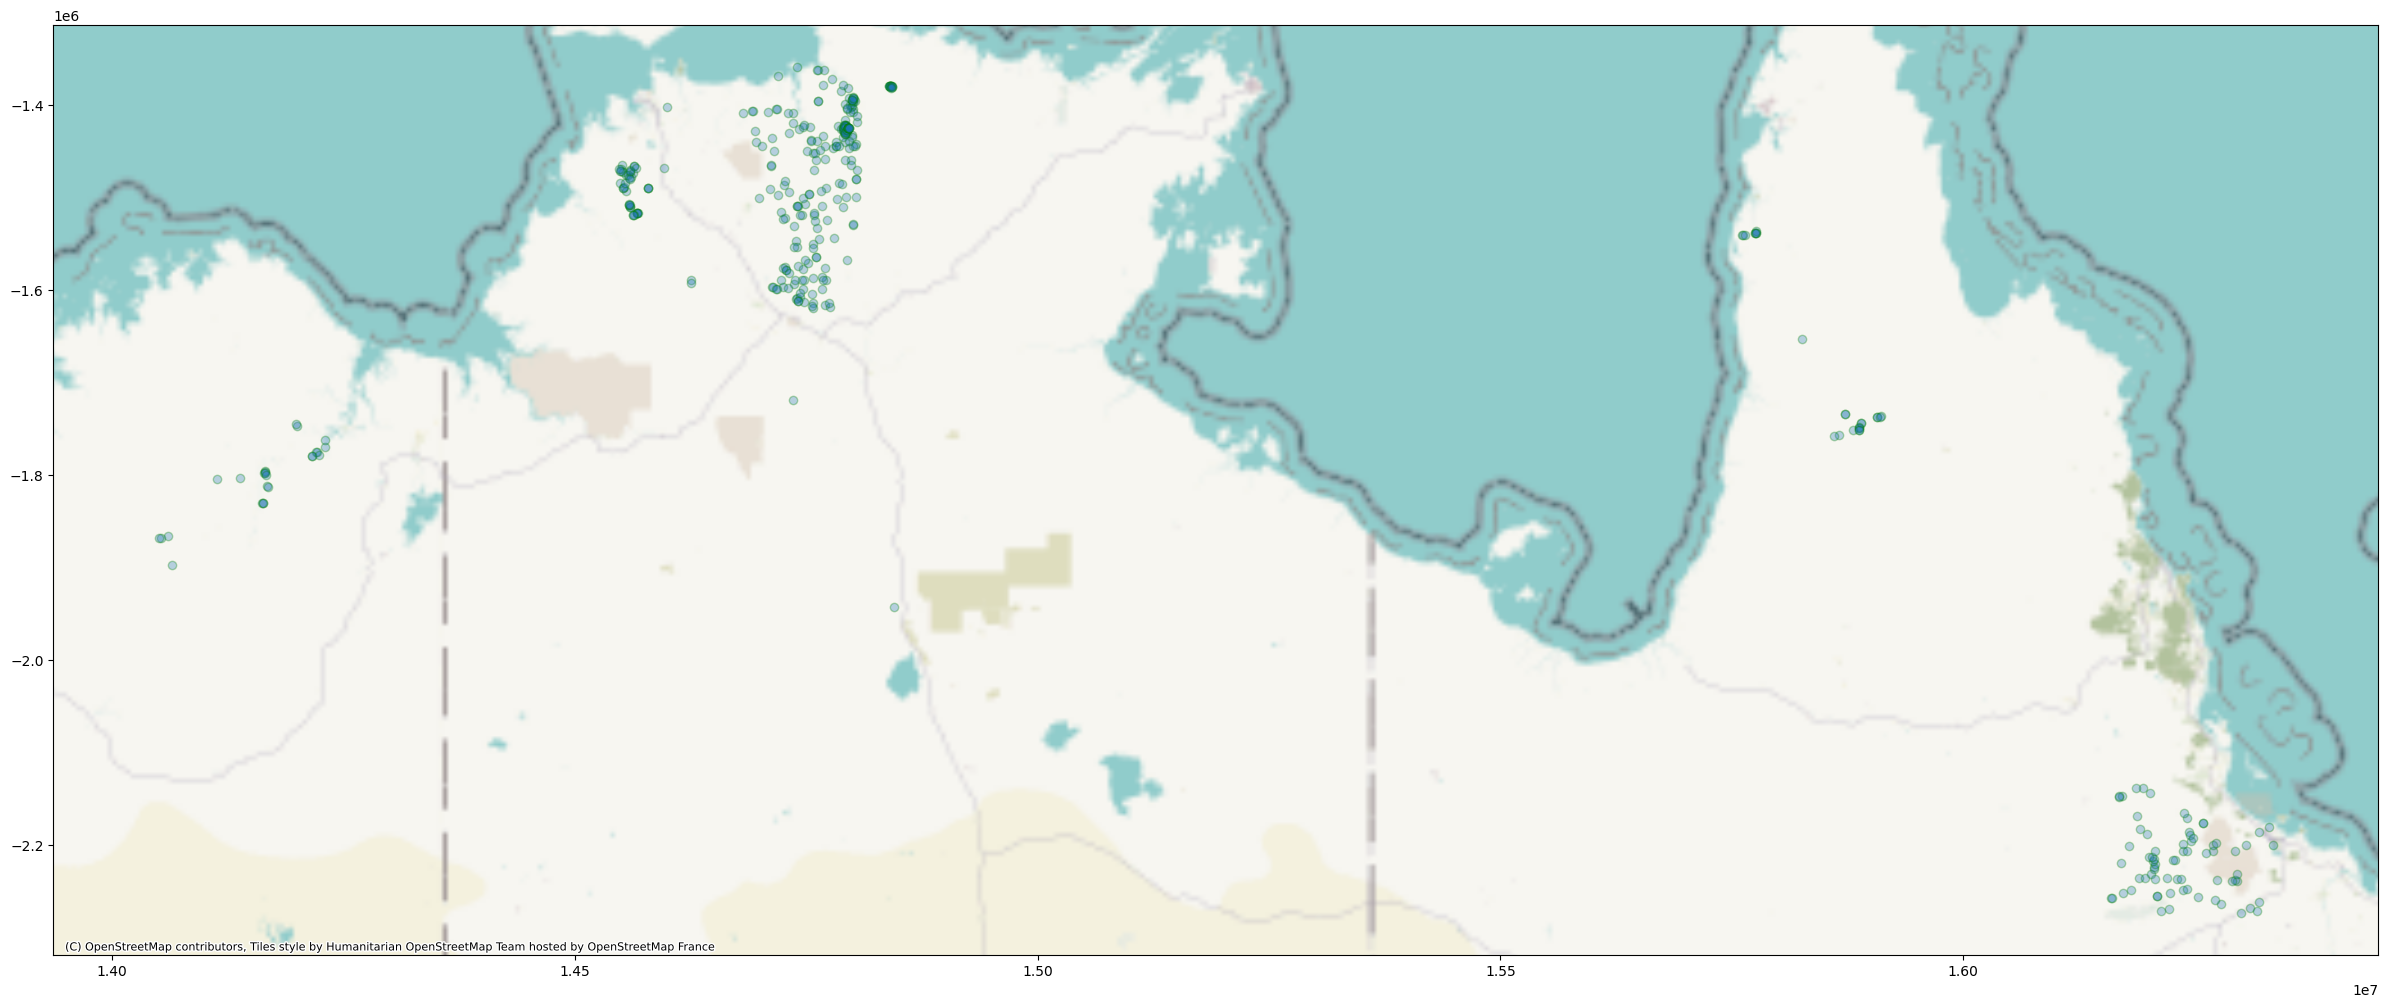

In [8]:
# creating a geopandas dataframe for visualisation of points
gdf = gpd.GeoDataFrame(batch1, geometry=batch1.geom)
# assiging CRS as WGS84
gdf.crs = "EPSG:4326"
# converting CRS to Web Mercator, the reference system of the contextily basemap
gdf_epsg3857 = gdf.to_crs(epsg=3857)
# plotting GEDI suborbits
ax=gdf_epsg3857[:-1].plot(figsize=(30, 15), alpha=0.3, edgecolor='green')
# adding to contextily basemap
ctx.add_basemap(ax)

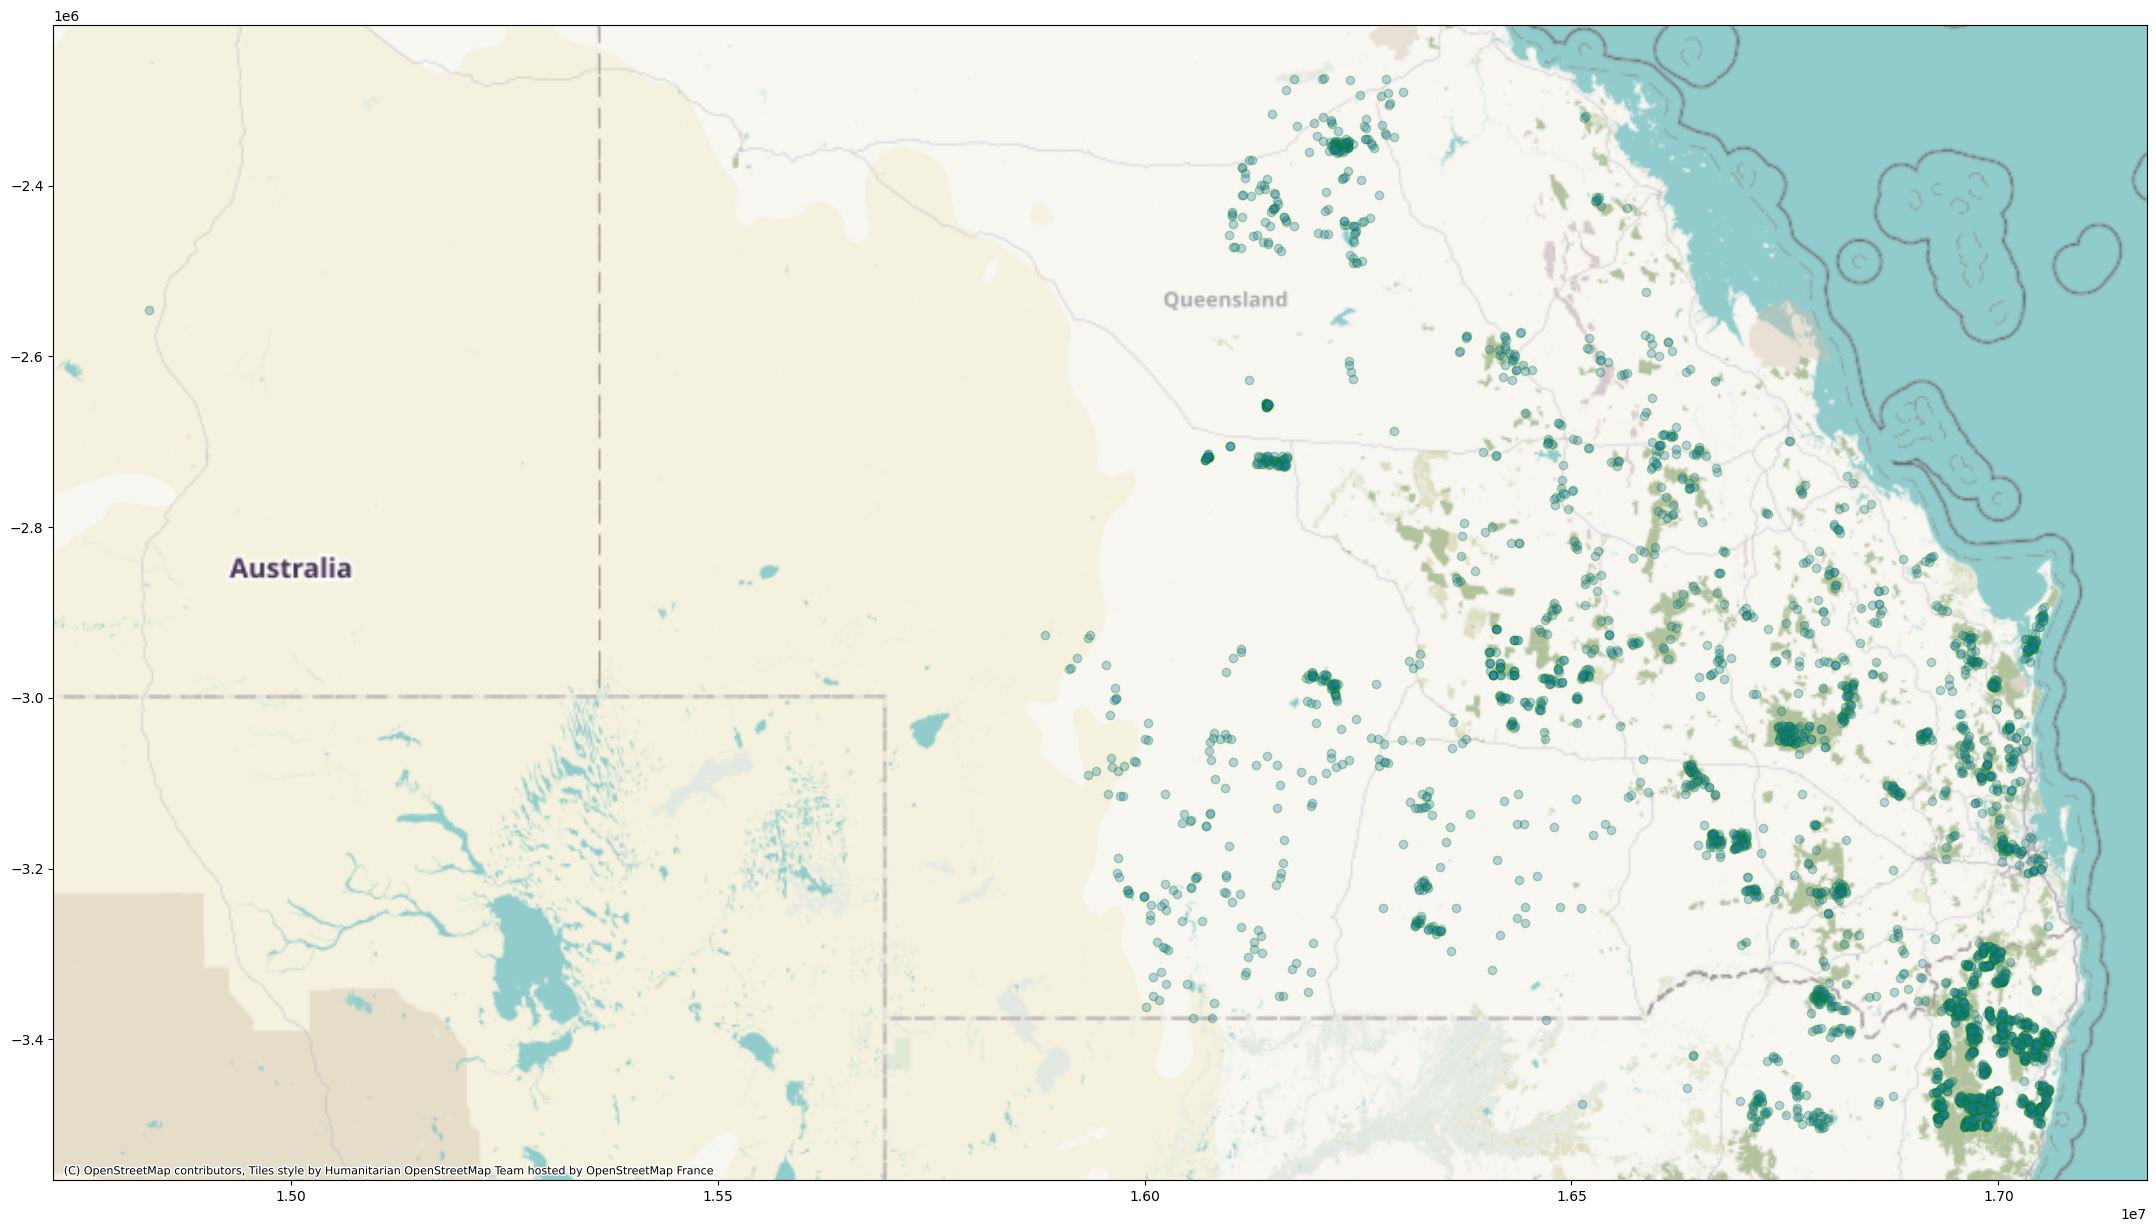

In [9]:
# creating a geopandas dataframe for visualisation of points
gdf = gpd.GeoDataFrame(batch2, geometry=batch2.geom)
# assiging CRS as WGS84
gdf.crs = "EPSG:4326"
# converting CRS to Web Mercator, the reference system of the contextily basemap
gdf_epsg3857 = gdf.to_crs(epsg=3857)
# plotting GEDI suborbits
ax=gdf_epsg3857[:-1].plot(figsize=(30, 15), alpha=0.3, edgecolor='green')
# adding to contextily basemap
ctx.add_basemap(ax)

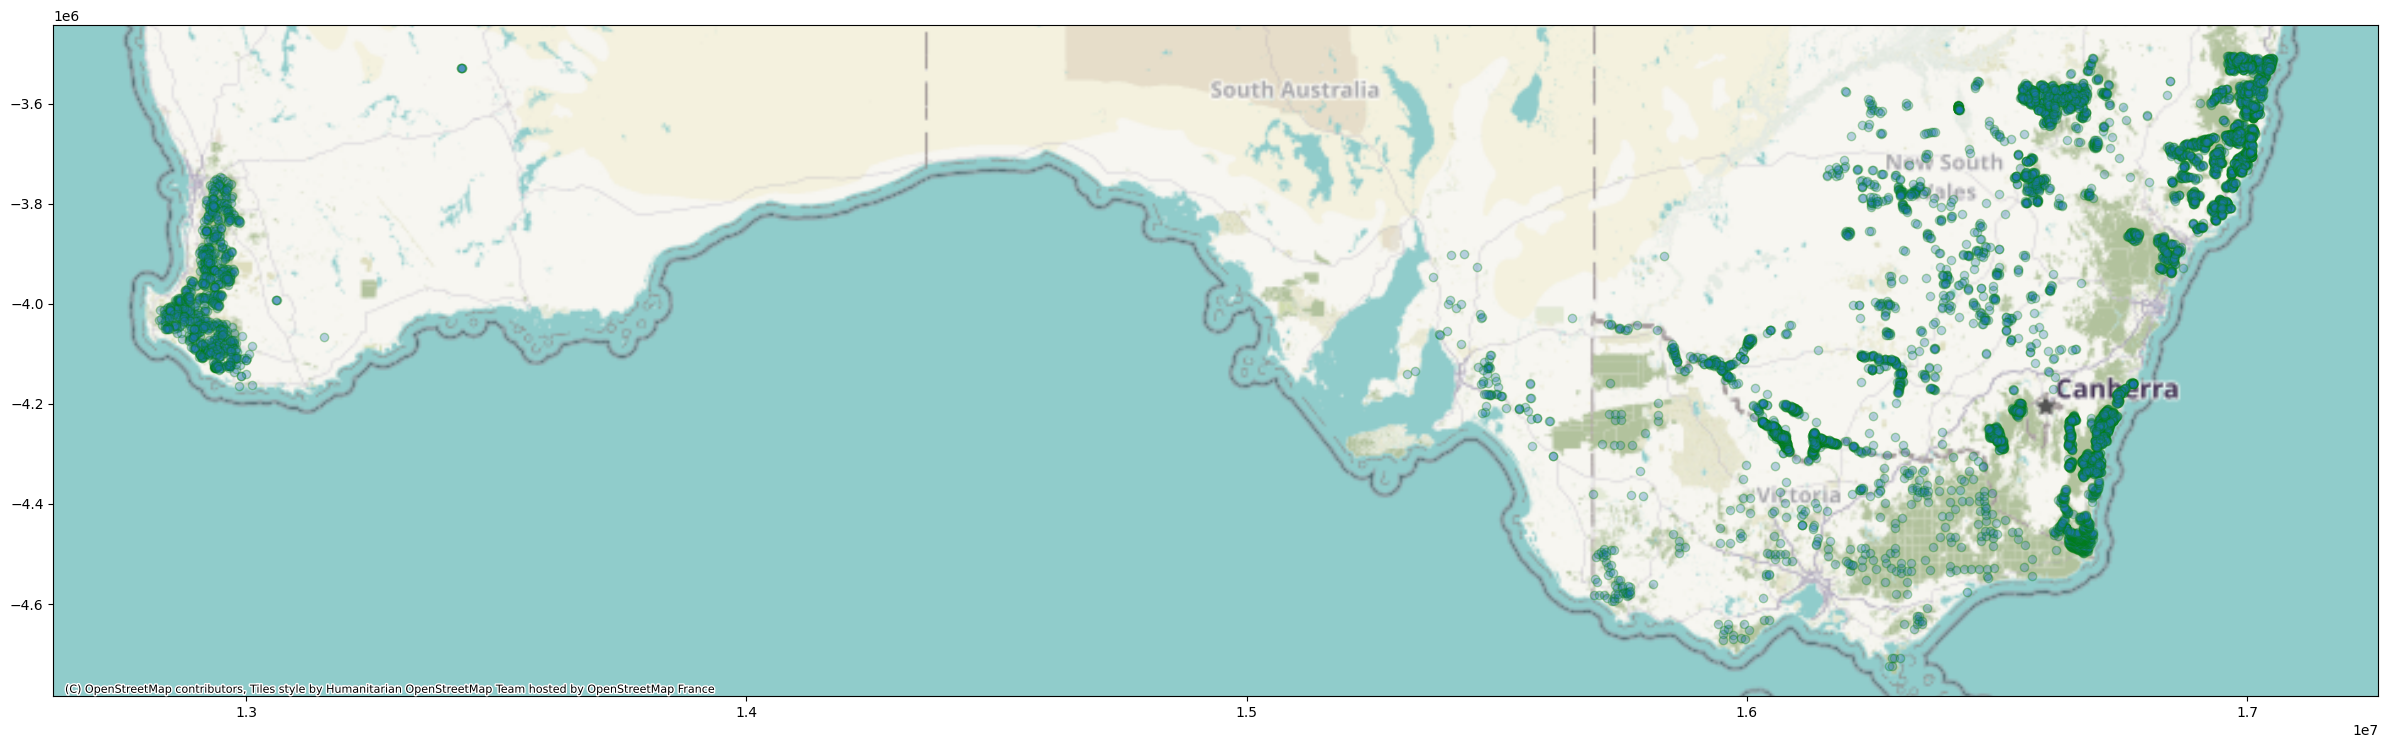

In [10]:
# creating a geopandas dataframe for visualisation of points
gdf = gpd.GeoDataFrame(batch3, geometry=batch3.geom)
# assiging CRS as WGS84
gdf.crs = "EPSG:4326"
# converting CRS to Web Mercator, the reference system of the contextily basemap
gdf_epsg3857 = gdf.to_crs(epsg=3857)
# plotting GEDI suborbits
ax=gdf_epsg3857[:-1].plot(figsize=(30, 15), alpha=0.3, edgecolor='green')
# adding to contextily basemap
ctx.add_basemap(ax)

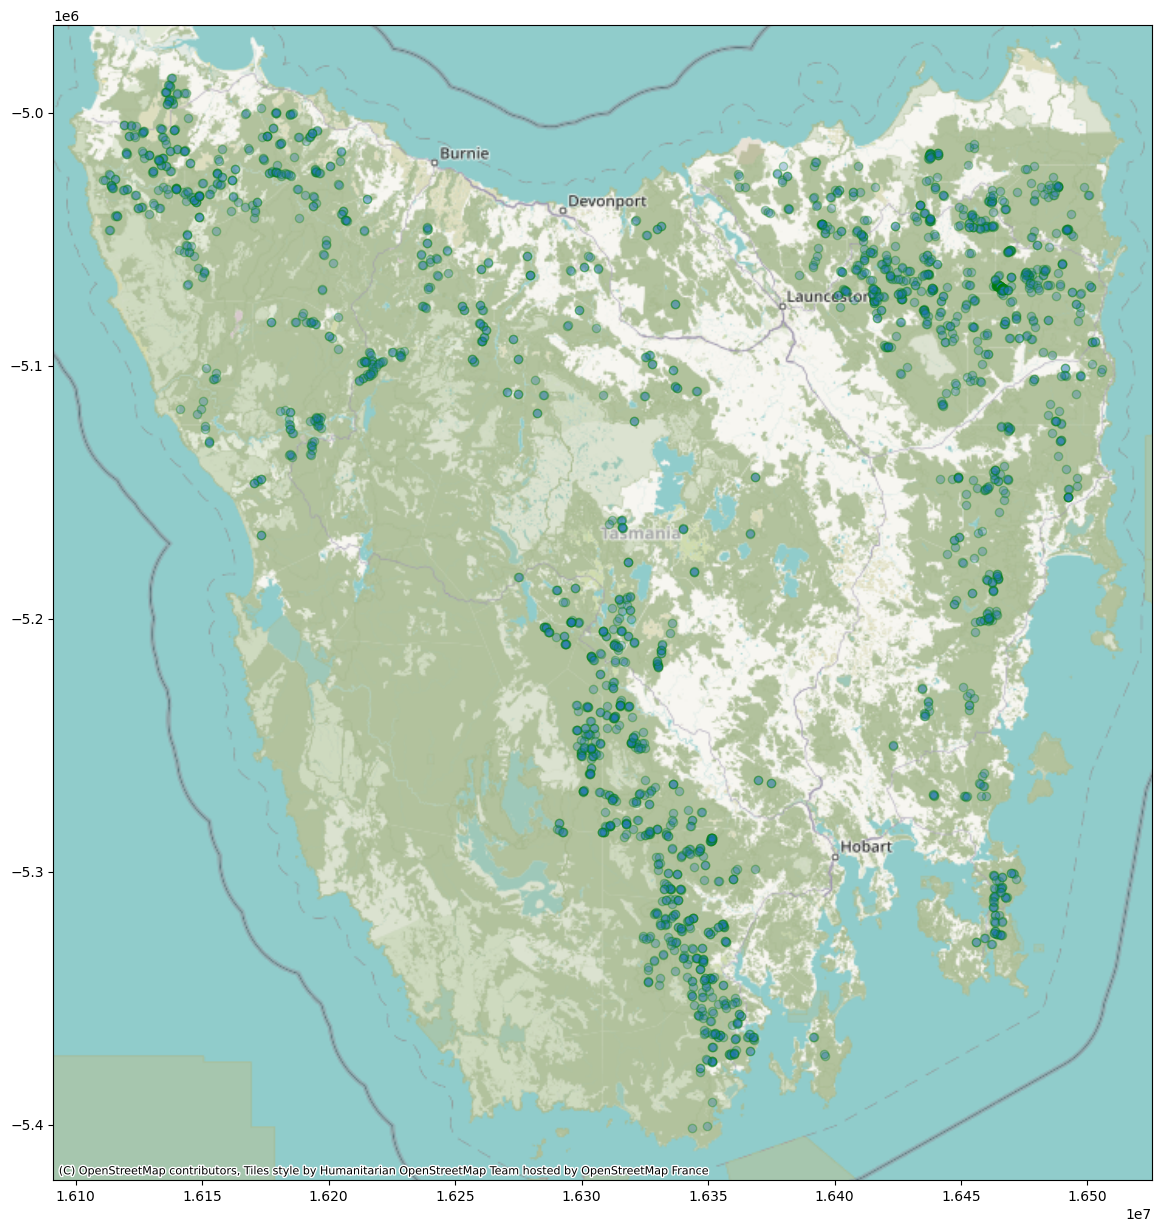

In [11]:
# creating a geopandas dataframe for visualisation of points
gdf = gpd.GeoDataFrame(batch4, geometry=batch4.geom)
# assiging CRS as WGS84
gdf.crs = "EPSG:4326"
# converting CRS to Web Mercator, the reference system of the contextily basemap
gdf_epsg3857 = gdf.to_crs(epsg=3857)
# plotting GEDI suborbits
ax=gdf_epsg3857[:-1].plot(figsize=(30, 15), alpha=0.3, edgecolor='green')
# adding to contextily basemap
ctx.add_basemap(ax)

In [21]:
def latLonBoxByWandH(lat,lon,ew_width,ns_height):
    lats, lons = [], []
    #distance in m, az (in deg), lat (in deg), long (in deg)

    res = pygc.great_circle(distance=ew_width/2, azimuth=90, latitude=lat, longitude=lon)
    lat, lon = res['latitude'], res['longitude']

    res = pygc.great_circle(distance=ns_height/2, azimuth=180, latitude=lat, longitude=lon)
    lat, lon = res['latitude'], res['longitude']
    lats.append(lat), lons.append(lon)

    res = pygc.great_circle(distance=ew_width, azimuth=270, latitude=lat, longitude=lon)
    lat, lon = res['latitude'], res['longitude']
    lats.append(lat), lons.append(lon)

    res = pygc.great_circle(distance=ns_height, azimuth=0, latitude=lat, longitude=lon)
    lat, lon = res['latitude'], res['longitude']
    lats.append(lat), lons.append(lon)

    res = pygc.great_circle(distance=ew_width, azimuth=90, latitude=lat, longitude=lon)
    lat, lon = res['latitude'], res['longitude']
    lats.append(lat), lons.append(lon)
    
    return {'lats':lats,'lons':lons}

In [40]:
ew_width = 2000
ns_height = 2000

sitelist = batch3['site']
lat = list(batch3['latitude'])
lon = list(batch3['longitude'])
projectlist = list(batch3["project"])

#loc_lon,loc_lat
loc_lat = np.asfarray(lat,float)
loc_lon = np.asfarray(lon,float)
len(loc_lat),len(loc_lon)

(7246, 7246)

In [42]:
polygons,footprint =[], []

for lat, lon, code in tqdm(zip(loc_lat,loc_lon, sitelist), total = len(loc_lat)):

    box = latLonBoxByWandH(lat,lon,ew_width,ns_height)
    
    polygon_geom = Polygon(zip(box['lons'], box['lats']))
    footprint.append(polygon_geom)
    crs = CRS('epsg:4326')
    polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])  

    polygons.append([code,polygon, box])

100%|██████████| 7246/7246 [00:13<00:00, 532.96it/s]


In [43]:
nonoverlappolies = []

for i, j, k in polygons:
    for m, p, o in polygons:
        intersection = j.intersects(p)
        if (intersection[0] == True) and (j is not p):
            if ([m, p, o] not in nonoverlappolies):
                nonoverlappolies.append([m,p, o])  

In [44]:
len(nonoverlappolies)

5709

In [45]:
res = [i for i in polygons if i not in nonoverlappolies]

In [46]:
df = pd.DataFrame(res, columns=['code','geom','box'])
df

code                                               geom  \
0         S_k_7                                              ge...   
1         S_k_8                                              ge...   
2        S_k_14                                              ge...   
3        S_k_15                                              ge...   
4        S_k_19                                              ge...   
...         ...                                                ...   
1532  S_k_12458                                              ge...   
1533  S_k_12459                                              ge...   
1534  S_k_12460                                              ge...   
1535  S_k_12461                                              ge...   
1536  S_k_12462                                              ge...   

                                                    box  
0     {'lats': [-36.43121117318837, -36.431209089911...  
1     {'lats': [-36.42321118544106, -36.423209102769...  
2     {'lats': [-36.52871102377333, -36.528708933113...  
3     {'lats': [-36.58691093450914, -36.586908839432...  
4     {'lats': [-36.569710960895414, -36.56970886712...  
...                                                 ...  
1532  {'lats': [-31.108619044210318, -31.10861733904...  
1533  {'lats': [-30.739819565245526, -30.73981788467...  
1534  {'lats': [-30.690619634482193, -30.69061795717...  
1535  {'lats': [-30.68481964263996, -30.684817965718...  
1536  {'lats': [-32.078017657982514, -32.07801588728...  

[1537 rows x 3 columns]

In [47]:
df.to_csv(f'batch3.csv')